# Аналитика в авиакомпании

Для российской авиакомпании, выполняющей внутренние пассажирские авиаперевозки, при помощи запросов SQL были выгружены таблицы, в которых содежатся сведения:

•	model — модели самолета

•	flights_amount — количество рейсов для каждой модели самолетов в сентябре 2018 года

•	city — города

•	average_flights — среднее количество рейсов, прибывающих в город city за день в августе 2018 года

В данном исследовании необходимо выбрать топ-10 городов по количеству рейсов и выбрать популярные модели самолетов.

## Изучение данных из файла

In [1]:
# Загрузим библиотеки, которые понадобятся
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 
import seaborn as sns 
from collections import Counter
from nltk.stem import SnowballStemmer 
russian_stemmer = SnowballStemmer('russian')  
import requests 
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Прочитаем файл csv и сохраним его
try:
    aircrafts = pd.read_csv('/datasets/query_1.csv')
except:
    aircrafts = pd.read_csv('query_1.csv')
display(aircrafts.head(10))

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


model — модель самолета

flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

In [3]:
# Общая информация
aircrafts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
# Количество нулевых строк
aircrafts.isna().sum()

model             0
flights_amount    0
dtype: int64

Нулевых строк не обнаружено, тип данных подходит для исследований. Строк в таблице мало, визуально понятно, что дубликатов нет.

In [5]:
# Прочитаем файл csv и сохраним его
try:
    city = pd.read_csv('/datasets/query_3.csv')
except:
    city = pd.read_csv('query_3.csv')
display(city.head(5))

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


city — город

average_flights — среднее количество рейсов, прибывающих в город city за день в августе 2018 года

In [6]:
# Общая информация
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [7]:
# Количество нулевых строк
city.isna().sum()

city               0
average_flights    0
dtype: int64

In [8]:
#Проверка на дубликаты
print('Количество дубликатов -', city.duplicated().sum())

Количество дубликатов - 0


#### Вывод

Пропусков и дубликатов в данных не обнаружно.

Окрегление в average_flights можно поправить до десятых.
В таблице aircrafts можно добавить столбец, группирующий модели Boeing и Airbus.

## Предобработка и исследовательский анализ данных

Созадим таблицу, в которой модели Boeing и Airbus будуmт объединены в группы

In [9]:
# Возвращает  группу моделей по названию

def model_group(model):
    for i in model.split(): 
        stemmed_word = russian_stemmer.stem(i)
        if stemmed_word == 'Boeing':
            return "Boeing"
        if stemmed_word == 'Airbus':
            return "Airbus"
        else:
            return model

In [10]:
# Применим функцию
aircrafts['model_group'] = aircrafts['model'].apply(model_group)
aircrafts

,model,flights_amount,model_group
0,Airbus A319-100,607,Airbus
1,Airbus A321-200,960,Airbus
2,Boeing 737-300,630,Boeing
3,Boeing 767-300,600,Boeing
4,Boeing 777-300,300,Boeing
5,Bombardier CRJ-200,4446,Bombardier CRJ-200
6,Cessna 208 Caravan,4557,Cessna 208 Caravan
7,Sukhoi SuperJet-100,4185,Sukhoi SuperJet-100


In [11]:
# Таблица, суммирующая количество перелетов по группам марок самолетов 
aircrafts_piv = aircrafts.groupby('model_group').sum().sort_values('flights_amount', ascending=False)
aircrafts_piv

,flights_amount
model_group,
Cessna 208 Caravan,4557
Bombardier CRJ-200,4446
Sukhoi SuperJet-100,4185
Airbus,1567
Boeing,1530


In [12]:
#Функция для графиков
#Напишем функцию, строящую графики типа bar
#датасет, название, ось х, ось у
    
def bar_plot(x_data, title="", xl="", yl="" ):    
    ax = x_data.plot.bar(rot=0, figsize = (15, 6), grid = True)
    ax.set_title(title) #подписали график
    plt.legend() #легенда
    plt.xlabel(xl) #подписали ось х
    plt.ylabel(yl) #подписали ось y
    plt.show()

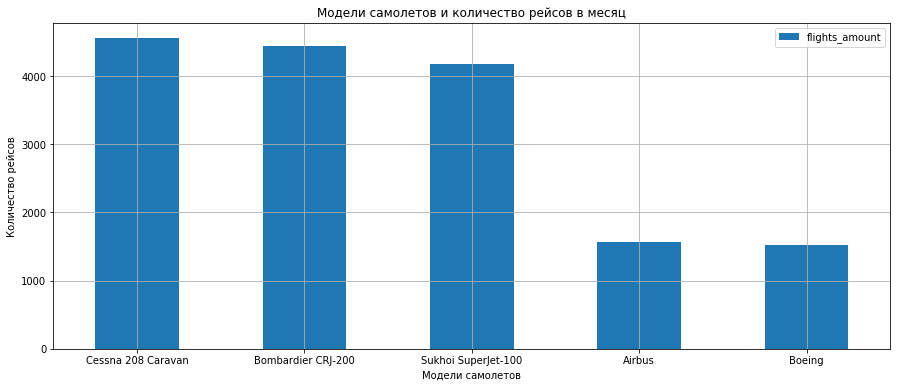

In [13]:
#Построим график
#датасет, название, ось х, ось у
bar_plot(aircrafts_piv, 'Модели самолетов и количество рейсов в месяц', 'Модели самолетов', 'Количество рейсов')

В сентябре 2018 наибольшее количество рейсов выполняет бизнес-джет Cessna 208 Caravan, в нем всего 14 мест, вторым идет Bombardier CRJ-200	с 50 местами, далее Sukhoi SuperJet-100 с 103 местами. Наиболее популярными оказываются модели небольших самолетов.
Со значительным отрывом идут группы Airbus и Boeing, которые даже в сумме уступают Sukhoi SuperJet-100. 
Самолеты Airbus и Boeing более вместительны (от 150 мест) и служат для регулярных пассажирских авиаперевозок.

Исследуем города и количество рейсов.

In [14]:
# Выберем топ-10 городов по количеству рейсов
pd.options.display.float_format = '{:.1f}'.format
city = city.sort_values('average_flights', ascending=False)
city.head(10)

,city,average_flights
43,Москва,129.8
70,Санкт-Петербург,31.2
54,Новосибирск,17.3
33,Красноярск,11.6
20,Екатеринбург,11.3
67,Ростов-на-Дону,10.2
63,Пермь,10.1
10,Брянск,10.0
74,Сочи,9.6
84,Ульяновск,9.6


In [15]:
city_piv_all=city.sort_values(by='average_flights', ascending=False)

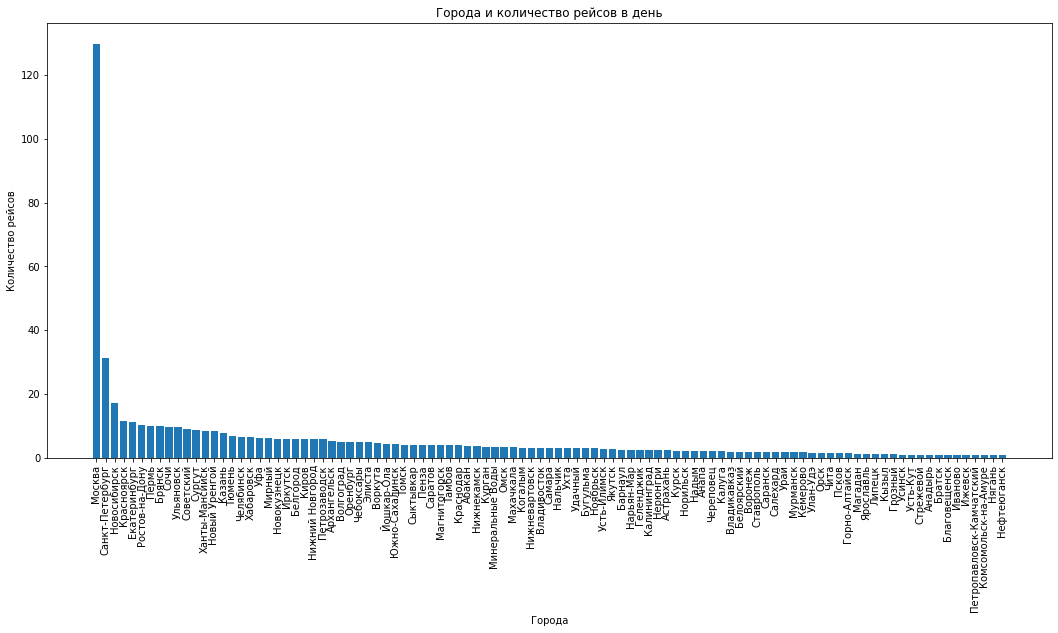

In [16]:
#Построим график
fig, ax = plt.subplots() 
ax.bar(city['city'], city['average_flights'])
fig.set_figheight(8)  # высота
fig.set_figwidth(18)  # ширина 
labels = city['city']
ax.set_title('Города и количество рейсов в день') #подписали график
plt.xticks(city['city'], labels, rotation='vertical')
plt.xlabel('Города') #подписали ось х
plt.ylabel('Количество рейсов') #подписали ось y
plt.show()

По графику видно, что Москва существенно лидирует по кол-ву рейсов и намного опережает джругие города, имеем "длинный хвост". Посмотрим медианные значения количества полетов в день.

In [17]:
#Опишем характеристики 
print(city['average_flights'].describe())

count   101.0
mean      5.5
std      13.1
min       1.0
25%       2.0
50%       3.0
75%       5.9
max     129.8
Name: average_flights, dtype: float64


In [18]:
#Опишем характеристики без Москвы
print(city.query('city != "Москва"')['average_flights'].describe())

count   100.0
mean      4.3
std       4.0
min       1.0
25%       2.0
50%       3.0
75%       5.5
max      31.2
Name: average_flights, dtype: float64


У Москвы почти четверть суммы всех перелетов по России в день (примерно 130). На втором месте — Санкт-Петербург. 
Из-за кол-ва перелетов по Москве стандартное отклонение достаточно велико, остальные города существенно меньше загружены. Убрав Москву, сразу получили стандартное отклонение ниже — 4, видно, что по другим городам значение прилетов в день колеблется в основном от 2 до 6. Медианное значение перелетов в день — 3шт. 

В Москве население гораздо больше, чем в других городах, поэтому интереснее сравнить количество перелетов в день относительно миллиона жителей в разных городах. Для это потребуется дополнительное исследование, см ниже.

In [19]:
#чтобы понять, какое процентное отношение ко всем полетам
#составляют полеты в основные 10 городов
#поделим average_flights на общее кол-во полетов

city['average_flights_%'] = city['average_flights']/(city['average_flights'].sum())
city = city.sort_values('average_flights', ascending=False)
display(city.head(10).style.format({('average_flights_%'):'{:.2%}', ('average_flights'):'{:.1f}'}))

,city,average_flights,average_flights_%
43,Москва,129.8,23.39%
70,Санкт-Петербург,31.2,5.62%
54,Новосибирск,17.3,3.12%
33,Красноярск,11.6,2.09%
20,Екатеринбург,11.3,2.04%
67,Ростов-на-Дону,10.2,1.84%
63,Пермь,10.1,1.83%
10,Брянск,10.0,1.80%
74,Сочи,9.6,1.73%
84,Ульяновск,9.6,1.73%


В Москву прибывает почти четверть всех внутренних рейсов

In [20]:
# Выбираем топ-10 городов для графика
city_piv=city.iloc[:10][['city', 'average_flights']]
city_piv.set_index('city', inplace=True)

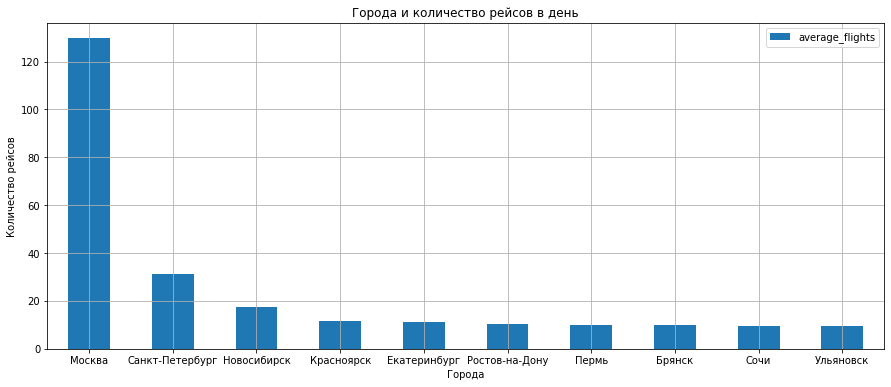

In [21]:
#Построим график
#датасет, название, ось х, ось у
bar_plot(city_piv, 'Города и количество рейсов в день', 'Города', 'Количество рейсов')

### Вывод

В сентябре 2018 наибольшее количество рейсов выполняли бизнес-джеты Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi SuperJet-100, опережая Airbus и Boeing. В сумме бизнес-джеты проводили в 4 раза больше перелетов, чем самолеты Airbus и Boeing, которые служат для регулярных пассажирских авиаперевозок.

Исследования количество перелетов в день в августе 2018 показали, в среднем, в день в Москву прибывает наибольшее количестве рейсов, и это почти четверть всех рейсов в день по России. 

Медианное значение количества рейсов по городам - 3шт. По остальным городам (без Москвы) количество прилетов в день колеблется от 2 до 6.

## Парсинг, анализ данных по городам

В Москве жителей больше, чем в других городах, поэтому сравним количество перелетов в день относительно миллиона жителей в разных городах. 
Для это проведем парсинг страницы в википедии со списком городов России с населением более 100 000 чел.

https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D0%BE%D0%B2_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8_%D1%81_%D0%BD%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5%D0%BC_%D0%B1%D0%BE%D0%BB%D0%B5%D0%B5_100_%D1%82%D1%8B%D1%81%D1%8F%D1%87_%D0%B6%D0%B8%D1%82%D0%B5%D0%BB%D0%B5%D0%B9

In [22]:
URL = 'https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D0%BE%D0%B2_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8_%D1%81_%D0%BD%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5%D0%BC_%D0%B1%D0%BE%D0%BB%D0%B5%D0%B5_100_%D1%82%D1%8B%D1%81%D1%8F%D1%87_%D0%B6%D0%B8%D1%82%D0%B5%D0%BB%D0%B5%D0%B9'
req = requests.get(URL) 
soup = BeautifulSoup(req.text, 'lxml') 

In [23]:
# применим метод find к тегу table
# укажем атрибут первой таблицы: class ='wikitable sortable'
table = soup.find('table',attrs={'class': 'wikitable sortable'})
content=[]

In [33]:
heading_table = [] # Список, в котором будут храниться названия столбцов
for row in table.find_all('th'): # Названия столбцов прячутся в элементах th, 
# поэтому будем искать все элементы th внутри table и пробегать по ним в цикле
        heading_table.append(row.text) # Добавляем контент из тега th в список heading_table методом append()

In [25]:
heading_table = ['№1', '№2','Город', '1897', '1926', '1939', '1959', '1970', '1979', '1989', '2002', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021\n']

In [32]:
content=[] # Список, в котором будут храниться данные из таблицы
for row in table.find_all('tr'): 
# Каждая строка обрамляется тегом tr, необходимо пробежаться в цикле по всем строкам
    if not row.find_all('th'): 
# Эта проверка необходима, чтобы пропустить первую строку таблицы с заголовками
            content.append([element.text for element in row.find_all('td')])
            # В каждой строке контент ячейки обрамляется тегами <td> </td>
            # Необходимо пробежаться в цикле по всем элементам td, вычленить контент из ячеек и добавить его в список 
            # Затем добавить каждый из списков в список content 

In [27]:
city_wiki = pd.DataFrame(content, columns=heading_table) 
# в качестве данных передаем двумерный список content, а в качестве заголовков - heading_table
display(city_wiki) 

,№1,№2,Город,1897,1926,1939,1959,1970,1979,1989,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021\n
0,1\n,2,Москва[18],1039,2080,4609,6133,7194,8057,8878,...,11613,11980,12108,12198,12330,12381,12506,12615,12678,12655\n
1,2\n,1,Санкт-Петербург,1265,1737,3431,3390,4033,4569,4989,...,4953,5028,5132,5192,5226,5282,5352,5384,5398,5384\n
2,3\n,,Новосибирск,8,120,404,885,1161,1309,1420,...,1499,1524,1548,1567,1584,1603,1613,1618,1626,1620\n
3,4\n,35,Екатеринбург,43,140,423,779,1025,1210,1296,...,1378,1396,1412,1428,1444,1456,1469,1483,1494,1495\n
4,5\n,4,Казань,130,179,406,667,869,989,1085,...,1161,1176,1191,1206,1217,1232,1244,1252,1257,1257\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,167\n,,Ханты-Мансийск,—,—,7,21,25,28,34,...,85,91,93,95,97,99,98,99,101,103\n
167,168\n,136,Ногинск,11,39,81,95,104,119,123,...,102,102,102,102,102,102,103,102,104,103\n
168,169\n,30,Елец,47,43,51,78,101,111,120,...,108,107,106,106,105,105,104,103,102,101\n
169,170\n,,Железногорск,—,—,—,—,31,65,85,...,96,97,98,99,100,101,101,100,100,101\n


In [28]:
# Нам потребуются данные за 2018 год по городам
city_wiki_end = city_wiki[['Город', '2018']]
# Переименуем столбцы
city_wiki_end.columns = ['city', 'population_2018']
city_wiki_end.loc[0, 'city'] = 'Москва'
city_wiki_end

,city,population_2018
0,Москва,12506
1,Санкт-Петербург,5352
2,Новосибирск,1613
3,Екатеринбург,1469
4,Казань,1244
...,...,...
166,Ханты-Мансийск,98
167,Ногинск,103
168,Елец,104
169,Железногорск,101


In [29]:
# Объединим полученную таблицу с таблицей city по городам
city_end=city.merge(city_wiki_end, on='city', how='inner')
city_end['population_2018_mln'] = city_end['population_2018'].astype(int)/1000
city_end = city_end[['city', 'average_flights', 'population_2018_mln']]
city_end

,city,average_flights,population_2018_mln
0,Москва,129.8,12.5
1,Санкт-Петербург,31.2,5.4
2,Новосибирск,17.3,1.6
3,Красноярск,11.6,1.1
4,Екатеринбург,11.3,1.5
...,...,...,...
71,Иваново,1.0,0.4
72,Ижевск,1.0,0.6
73,Петропавловск-Камчатский,1.0,0.2
74,Комсомольск-на-Амуре,1.0,0.2


In [30]:
# Создадим столбец flights_per_mln, который показывает количество прилетов в день на 1 млн человек населения
city_end['flights_per_mln'] = city_end['average_flights'] /city_end['population_2018_mln'] 
city_end = city_end.sort_values(by ='flights_per_mln', ascending = False)
print('Количество прилетов в день на 1 млн человек населения')
city_end[['city' , 'flights_per_mln']]

Количество прилетов в день на 1 млн человек населения


,city,flights_per_mln
11,Ханты-Мансийск,85.9
12,Новый Уренгой,72.1
28,Элиста,47.3
44,Ноябрьск,28.0
7,Брянск,24.6
...,...,...
66,Липецк,2.5
71,Иваново,2.5
65,Ярославль,2.2
59,Воронеж,1.9


Оказывается, что в среднем, наибольшее количество рейсов за день в августе 2018 года относительно 1млн человек прибывает в Ханты-Мансийск, а наименьшее - в Ижевск. Если рассматривать только города-миллионники, то результаты будут следующие:

In [31]:
# Создадим столбец flights_per_mln, который показывает количество прилетов в день на 1 млн человек населения
# для крупных городов с населенем более 1 млн чел
city_end_mln = city_end.query('population_2018_mln >= 1')
city_end_mln['flights_per_mln'] = city_end_mln['average_flights'] /city_end_mln['population_2018_mln'] 
city_end_mln = city_end_mln.sort_values(by ='flights_per_mln', ascending = False)
print('Количество прилетов в день на 1 млн человек населения городов-миллионников')
city_end_mln[['city' , 'flights_per_mln']]

Количество прилетов в день на 1 млн человек населения городов-миллионников


,city,flights_per_mln
2,Новосибирск,10.7
3,Красноярск,10.6
0,Москва,10.4
6,Пермь,9.6
5,Ростов-на-Дону,9.0
4,Екатеринбург,7.7
13,Казань,6.2
1,Санкт-Петербург,5.8
17,Уфа,5.6
15,Челябинск,5.6


В крупных городах с населением более 1 млн.человек наибольшее количество рейсов за день в августе 2018 года относительно 1млн человек было в Новосибирске и Красноярске, на третьем месте - Москва. 

Вероятно, в этих городах наиболее загруженные аэропорты. Наименьшее кол-во рейсов на 1 млн.чл — в Воронеже и Самаре. 

## Вывод

В ходе работы были изучены данные о перелетах авиакомпании и применяемых моделях самолетов в августе-сентябре 2018 года.

По количеству рейсов выбраны топ-10 городов:
Москва, Санкт-Петербург, Новосибирск, Красноярск, Екатеринбург, Ростов-на-Дону, Пермь, Брянск, Сочи, Ульяновск.

Исследования количества перелетов в день в августе 2018 показали, что в среднем в день в Москву прибывает наибольшее количество рейсов, 130 шт. — почти четверть всех рейсов в день по России. 
Медианное значение рейсов по всем городам — 3шт. 
По другим городам значение прилетов в день колеблется, в основном, от 2 до 6.

Было проведено сравнение количества перелетов в день относительно количества жителей в городах-миллионниках. В крупных городах с населением более 1 млн.человек наибольшее количество рейсов за день в августе 2018 года относительно 1млн.чл населения было в Новосибирске и Красноярске, на третьем месте - Москва (около 11 прилетов на 1млн.чл). Наименьшее - в Воронеже и Самаре (около 2 прилетов на 1млн.чл). 


В сентябре 2018 наибольшее количество рейсов выполняли бизнес-джеты Cessna 208 Caravan (на первом месте), Bombardier CRJ-200, Sukhoi SuperJet-100, опережая Airbus и Boeing. 
В сумме три бизнес-джета проводили в 4 раза больше перелетов, чем суммарное значение рейсов по моделям Airbus и Boeing, которые служат для регулярных пассажирских авиаперевозок.